<a href="https://colab.research.google.com/github/priyadarshi0007/NEW-NLP_AIEngineeringPlaylist/blob/master/OCR_on_Financial_Document!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

     |████████████████████████████████| 48.4MB 88kB/s 


In [ ]:
!wget https://i.pinimg.com/originals/ee/40/7e/ee407ede9d8e0d4d869f8d3e81d1b28d.jpg

--2020-08-12 23:03:53--  https://i.pinimg.com/originals/ee/40/7e/ee407ede9d8e0d4d869f8d3e81d1b28d.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.193.24.222, 2600:1417:76:49d::1931, 2600:1417:76:492::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.193.24.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40003 (39K) [image/jpeg]
Saving to: ‘ee407ede9d8e0d4d869f8d3e81d1b28d.jpg’

ee407ede9d8e0d4d869 100%[===================>]  39.07K  --.-KB/s    in 0.004s  

2020-08-12 23:03:53 (8.88 MB/s) - ‘ee407ede9d8e0d4d869f8d3e81d1b28d.jpg’ saved [40003/40003]



In [22]:
import time
import easyocr
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


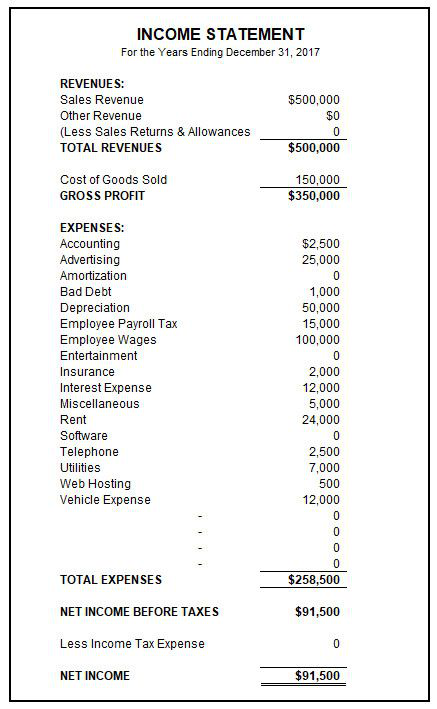

In [23]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open('ee407ede9d8e0d4d869f8d3e81d1b28d.jpg')
im

In [24]:
bounds = reader.readtext('ee407ede9d8e0d4d869f8d3e81d1b28d.jpg')
bounds

[([[132, 22], [308, 22], [308, 46], [132, 46]],
  'INCOME STATEMENT',
  0.18294648826122284),
 ([[165, 45], [323, 45], [323, 61], [165, 61]],
  'ears Ending December 31, 2017',
  0.16670900583267212),
 ([[119, 47], [157, 47], [157, 59], [119, 59]], 'For the', 0.7225116491317749),
 ([[59, 77], [127, 77], [127, 91], [59, 91]], 'REVEIUES:', 0.507597029209137),
 ([[59, 93], [147, 93], [147, 107], [59, 107]],
  'Sales Revenue',
  0.545446515083313),
 ([[287, 93], [343, 93], [343, 107], [287, 107]],
  '$5a0,000',
  0.041722171008586884),
 ([[59, 109], [145, 109], [145, 125], [59, 125]],
  'Other Revenue',
  0.7976108193397522),
 ([[325, 109], [343, 109], [343, 123], [325, 123]], '0', 0.3117116689682007),
 ([[59, 125], [177, 125], [177, 139], [59, 139]],
  'lLess Sales Returns',
  0.08367366343736649),
 ([[187, 125], [253, 125], [253, 139], [187, 139]],
  'Allgiances',
  0.16665597259998322),
 ([[59, 141], [165, 141], [165, 155], [59, 155]],
  'TOTAL REVEIUES',
  0.3292018473148346),
 ([[287,

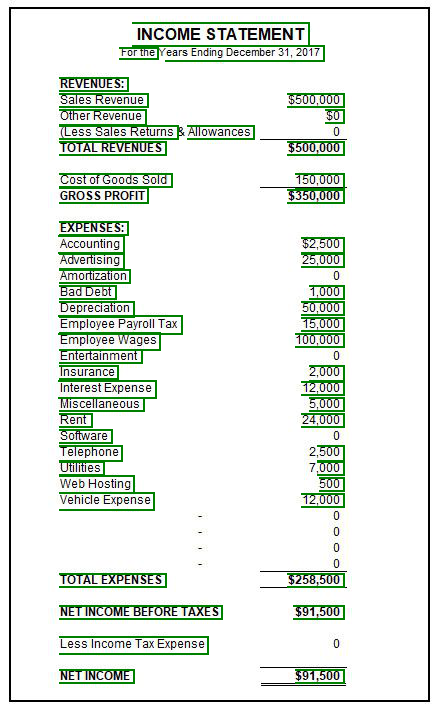

In [25]:
def draw_boxes(image,bounds,color = 'green',width = 2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3 = bound[0]
    draw.line([*p0,*p1,*p2,*p3], fill = color,width = 2)
  return image

draw_boxes(im,bounds)

In [26]:
start_time = time.clock()
bounds = reader.readtext('ee407ede9d8e0d4d869f8d3e81d1b28d.jpg',
                         decoder='beamsearch', #options are 'greedy', 'beamsearch' and 'wordbeamsearch'.
                         beamWidth = 5,    #How many beam to keep when decoder = 'beamsearch' or 'wordbeamsearch
                         batch_size = 1,   #batch_size>1 will make EasyOCR faster but use more memory
                         workers = 0,      #Number thread used in of dataloade
                         allowlist = None, #Force EasyOCR to recognize only subset of characters. Useful for specific problem (E.g. license plate, etc.)
                         blocklist = None, #Block subset of character. This argument will be ignored if allowlist is given.
                         detail =1,        #Set this to 0 for simple output
                         paragraph = False,#Combine result into paragraph
                         contrast_ths = 0.5,
                         adjust_contrast = 0.7,
                         filter_ths = 0.003,
                         text_threshold = 0.7, #Text confidence threshold
                         low_text = 0.4,    #Text low-bound score
                         link_threshold=0.4,#Link confidence threshold
                         canvas_size = 2560,#Maximum image size. Image bigger than this value will be resized down.
                         mag_ratio = 1.5,   #Image magnification ratio
                         slope_ths = 0.2,   #Maximum slope (delta y/delta x) to considered merging. Low value means tiled boxes will not be merged.
                         ycenter_ths = 0.5, #Maximum shift in y direction. Boxes with different level should not be merged.
                         height_ths = 0.7,  #Maximum different in box height. Boxes with very different text size should not be merged.
                         width_ths = 0.7,   #Maximum horizontal distance to merge boxes. 
                         add_margin = 0.5)  #Extend bounding boxes in all direction by certain value. This is important for language with complex script 


print('Time took for process one image :',time.clock() - start_time, "seconds")

Time took for process one image : 200.38824299999987 seconds


In [27]:
bounds

[([[126, 17], [314, 17], [314, 50], [126, 50]],
  'NNCOME STATEMENT',
  0.14644351601600647),
 ([[114, 38], [328, 38], [328, 66], [114, 66]],
  'Fortte Years Ending December 31, 2O17',
  0.02065945230424404),
 ([[52, 71], [131, 71], [131, 95], [52, 95]], 'REVENUES:', 0.7950105667114258),
 ([[52, 86], [150, 86], [150, 111], [52, 111]],
  'Sales Revenue',
  0.9010014533996582),
 ([[280, 86], [346, 86], [346, 111], [280, 111]],
  '$500,000',
  0.15644922852516174),
 ([[52, 102], [148, 102], [148, 127], [52, 127]],
  'Other Revenue',
  0.31757310032844543),
 ([[319, 103], [346, 103], [346, 127], [319, 127]], 'so', 0.26050716638565063),
 ([[52, 119], [257, 119], [257, 144], [52, 144]],
  'Cess Sales Returns & Allowances',
  0.06920957565307617),
 ([[52, 134], [168, 134], [168, 159], [52, 159]],
  'TOTAL REVENUES',
  0.7721794843673706),
 ([[280, 135], [347, 135], [347, 159], [280, 159]],
  'S5o0,000',
  0.29298126697540283),
 ([[52, 166], [174, 166], [174, 191], [52, 191]],
  'Cost of Goods

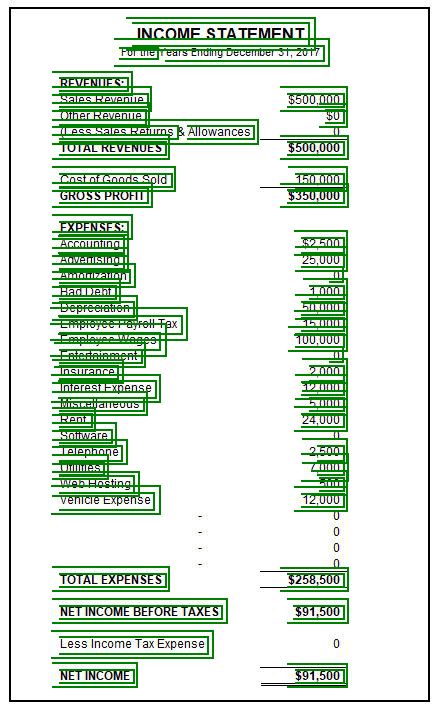

In [30]:
def draw_boxe(image,bounds,color = 'green',width = 2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3 = bound[0]
    draw.line([*p0,*p1,*p2,*p3], fill = color,width = 2)
  return image

draw_boxe(im,bounds)